# Omsk, Omsk Oblast, Russia and its religion.

The data is downloaded from http://unro.minjust.ru/NKOs.aspx 

Minjust is the Ministry of Justice of Russian Federation, these particular reports are free to download. 

The questions I answer here:

* What is the religion distribution based on the registered religious organisations?
* What is the activity of the registered religious organisations (ceremonies, religious education, charity)?
* What are the yearly expenditures of the religious organisations on their needs?

The picture is not full as not all religions are registered as organisations. For example, pagans, atheists, satanists etc. are left out. Also, very few organisations provided activity reports.
Unfortunately, it is impossible to answer the question about the religion demographic data, as it is forbidden by law to publish suh information.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# Read the data about the registered religious organisations, it is in Russian.
df = pd.read_excel('data/orgs.xlsx')
df.head()

,Учр номер,Наименование,ОГРН,Дата ОГРН,Адрес
0,5511010426,Местная религиозная организация мусульман цент...,1205500025675,12.11.2020,"644014, Омская обл, Омск г, Марьяновская 3-я у..."
1,5511010425,"Местная религиозная организация ""Приход храма ...",1205500017128,22.07.2020,"644077, Омская обл, Омск г, Народная ул, д. 17"
2,5511010424,Местная религиозная организация мусульман села...,1195543028933,06.11.2019,"646108, Омская обл, Называевский р-н, Старинка..."
3,5511010423,Местная религиозная организация мусульман села...,1195543024027,12.09.2019,"646580, Омская обл, Усть-Ишимский р-н, Большая..."
4,5511010422,Местная Исламская религиозная организация а. Д...,1195543024258,16.09.2019,"646048, Омская обл, Марьяновский р-н, Домбай а..."


In [3]:
print(len(df))
# There are 322 organisations in total

322


In [5]:
df['Religion'] = ''
df['Religion Group'] = ''

df = df.rename(columns={'Наименование': 'Name'})
df['Name'] = df['Name'].str.upper() 

df.loc[df['Name'].str.contains('БУДД'), 'Religion'] = 'Other'
df.loc[df['Name'].str.contains('БУДД'), 'Religion Group'] = 'Buddhism'
df.loc[df['Name'].str.contains('КРИШН') | df['Name'].str.contains('ШИВА'), 'Religion']='Other'
df.loc[df['Name'].str.contains('КРИШН') | df['Name'].str.contains('ШИВА'), 'Religion Group']='Induism'
df.loc[df['Name'].str.contains('ИУДЕ'), 'Religion'] = 'Other'
df.loc[df['Name'].str.contains('ИУДЕ'), 'Religion Group'] = 'Judaism'
df.loc[df['Name'].str.contains('ШАМАН'), 'Religion'] = 'Other'
df.loc[df['Name'].str.contains('ШАМАН'), 'Religion Group'] = 'Shaman'

df.loc[df['Name'].str.contains('МУСУЛЬМ') | df['Name'].str.contains('ИСЛАМ') | df['Name'].str.contains('ИМАН'), 'Religion'] = 'Islam'

df.loc[df['Name'].str.contains('ПАТРИАРХАТ') | df['Name'].str.contains('ПРАВОСЛАВ'), 'Religion']='Christianity'
df.loc[df['Name'].str.contains('ПАТРИАРХАТ') | df['Name'].str.contains('ПРАВОСЛАВ'), 'Religion Group']='Orthodox'
df.loc[df['Name'].str.contains('БАПТИСТ'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('БАПТИСТ'), 'Religion Group'] = 'Baptism'
df.loc[df['Name'].str.contains('КАТОЛИ'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('КАТОЛИ'), 'Religion Group'] = 'Catolicism'
df.loc[df['Name'].str.contains('МЕННОНИТ'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('МЕННОНИТ'), 'Religion Group'] = 'Mennonite'
df.loc[df['Name'].str.contains('МОЛОКАН'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('МОЛОКАН'), 'Religion Group'] = 'Molokan'
df.loc[df['Name'].str.contains('АРМЯН'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('АРМЯН'), 'Religion Group'] = 'Armenian Apostolic Ch.'
df.loc[df['Name'].str.contains('АДВЕНТИСТ'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('АДВЕНТИСТ'), 'Religion Group'] = 'Adventism'
df.loc[df['Name'].str.contains('НОВОАПОСТОЛ'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('НОВОАПОСТОЛ'), 'Religion Group'] = 'New Apostolic Ch.'
df.loc[df['Name'].str.contains('ПОСЛЕДНИХ ДНЕЙ'), 'Religion'] = 'Christianity'
df.loc[df['Name'].str.contains('ПОСЛЕДНИХ ДНЕЙ'), 'Religion Group'] = 'Mormon'
df.loc[(df['Name'].str.contains('ЕВАНГЕЛ')) & (~df['Name'].str.contains('БАПТИСТ')) & (~df['Name'].str.contains('ПРАВОС')), 'Religion'] = 'Christianity'
df.loc[(df['Name'].str.contains('ЕВАНГЕЛ')) & (~df['Name'].str.contains('БАПТИСТ')) & (~df['Name'].str.contains('ПРАВОС')), 'Religion Group'] = 'Baptism'

df_religion = df.groupby('Religion').agg({'Name': len})

df_other = df[df['Religion'] == 'Other'].groupby('Religion Group').agg({'Name': len})
df_christ = df[df['Religion'] == 'Christianity'].groupby('Religion Group').agg({'Name': len})


In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


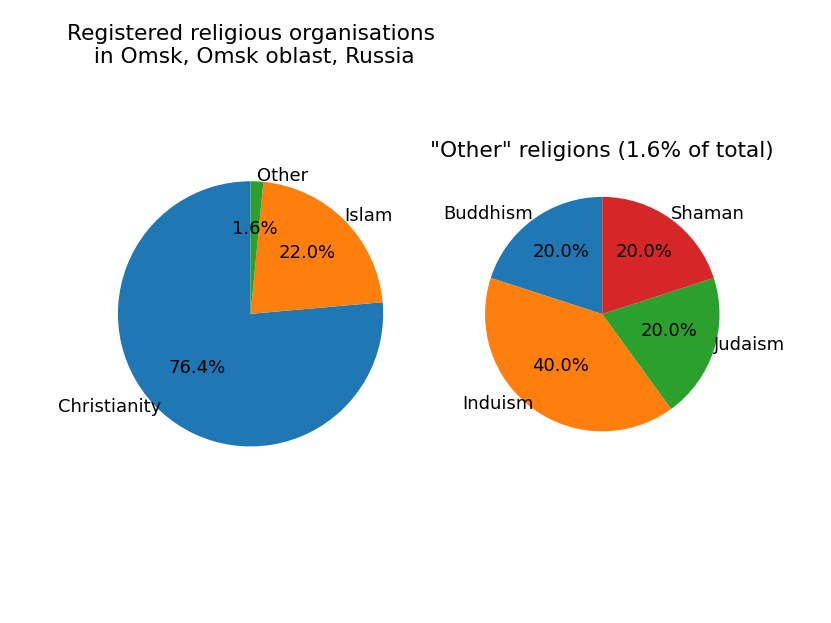

<IPython.core.display.Javascript object>


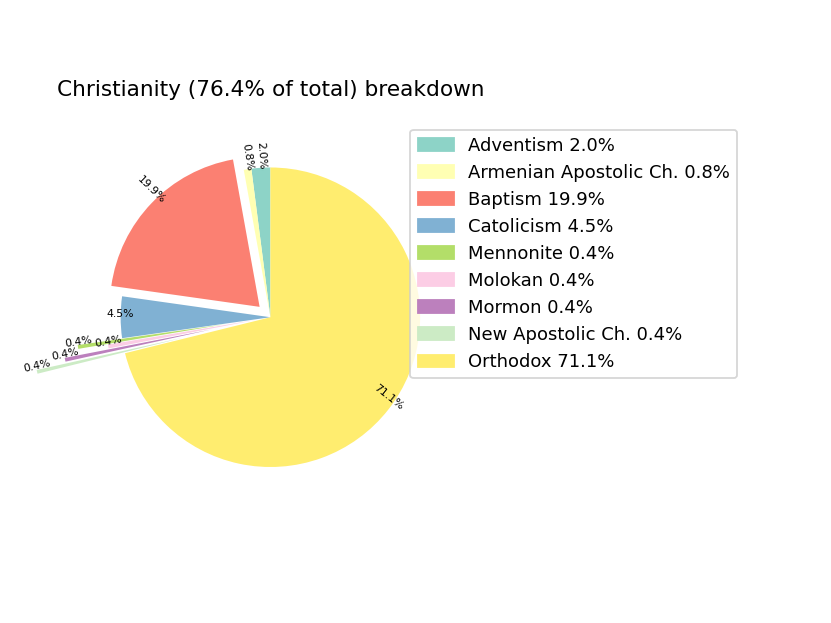

In [10]:
labels = df_religion.index
sizes = df_religion['Name']

fig1, (ax1, ax2) = plt.subplots(1, 2)

ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, labeldistance=1, rotatelabels=False,
        textprops = dict(va='baseline'))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Registered religious organisations\n in Omsk, Omsk oblast, Russia')

labels = df_other.index
sizes = df_other['Name']

ax2.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, labeldistance=1, rotatelabels=False,
        textprops = dict(va='baseline'))
ax2.set_title('"Other" religions (1.6% of total)')

fig2, ax3 = plt.subplots()

labels = df_christ.index
sizes = df_christ['Name']
total_christ = sum(sizes)
explode = (0, 0, 0.1, 0, 0.3, 0.1, 0.4, 0.6, 0)

labels_ = ['{:.1f}%'.format( sizes.iloc[i] * 100 / total_christ) for i, l in enumerate(labels)]

ax3.pie(sizes, 
        labels=labels_, autopct='',
        explode=explode,
        colors=[plt.cm.Set3((i)/8.) for i, l in enumerate(labels)],
        startangle=90, labeldistance=1, rotatelabels=True,
        textprops = dict(ha='center', va='baseline', fontsize=6))
ax3.set_title('Christianity (76.4% of total) breakdown\n')

handles = []
total_christ = sum(sizes)
labels_ = ['{} {:.1f}%'.format(l, sizes.iloc[i] * 100 / total_christ) for i, l in enumerate(labels)]
for i, l in enumerate(labels_):
    handles.append(Patch(color=plt.cm.Set3((i)/8.), label=l))
plt.legend(handles,labels_, bbox_to_anchor=(0.85,1.025), loc="upper left")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.55)

plt.show()


In [16]:
# Read data about the organisations activity
df = pd.read_excel('data/church_reports.xlsx', skiprows=1)
df.head()

,ОГРН,Наименование,Адрес,"Совершение религиозных обрядов, таинств, церемоний",Религиозное образование,Распространение вероучения непосредственно или через СМИ,Культурно-просветительская деятельность,Распространение предметов религиозного назначения и религиозной литературы,Благотворительная деятельность и иная деятельность в сфере социального обслуживания,Отчетный период,Поступления от российских юридических лиц,Поступления от иностранных юридических лиц,"Гранты, техническая или гуманитарная помощь от иностранных государств",Доходы от предпринимательской деятельности,Поступления от граждан Российской Федерации,"Расходы за период, тыс. Руб."
0,1085500001707,"Местная Религиозная Организация ""Церковь Божия...","644903Омская обл, Омский р-н, деревня Приветна...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,NaN,NaN
1,1 0 2 5 5 0 0 0 0 2 8 3 5,Религиозное учреждение - Омское отделение Благ...,"644070, г.Омск, ул.Звездова, д.62 / 1",1.0,NaN,NaN,1.0,NaN,1.0,2013,1.0,1.0,1.0,1.0,1.0,15043.0
2,1 0 2 5 5 0 0 0 0 6 5 7 5,"Омская областная Христианская Церковь ""Часовня...","644076 г.Омск, пр. Космический, д.28, к.19",1.0,NaN,NaN,1.0,1.0,1.0,2013,NaN,NaN,NaN,NaN,1.0,173.0
3,1 0 2 5 5 0 0 0 0 6 8 2 8,"Местная религиозная организация ""Церковь Свято...","Омская обл.,Москаленский р-н, р.п.Москаленки, ...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,99876.0
4,1 0 3 5 5 0 0 0 0 1 8 7 7,"Местная религиозная организация ""Церковь Свято...","644033, г.Омск, ул. 8-я Северная, д.113",1.0,NaN,1.0,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,2473.0


In [17]:
# "Performing religious rites, sacraments, ceremonies" - "Ceremony" boolean column
# "Spread doctrine in media" - "Media Spread" boolean colums

df = df.rename(columns=lambda x: x.strip())
df = df.rename(columns={'Наименование': 'Name', 'Отчетный период': 'Year',
                        'Совершение религиозных обрядов, таинств, церемоний': 'Ceremony',
                        'Распространение вероучения непосредственно или через СМИ': 'Media Spread',
                        'Религиозное образование': 'Religious Education',
                        'Культурно-просветительская деятельность': 'Cultural Activities',
                        'Распространение предметов религиозного назначения и религиозной литературы': 'Literature Distribution',
                        'Благотворительная деятельность и иная деятельность в сфере социального обслуживания': 'Charity',
                        'Расходы за период, тыс. Руб.': 'Expenditures'})

df.head()

,ОГРН,Name,Адрес,Ceremony,Religious Education,Media Spread,Cultural Activities,Literature Distribution,Charity,Year,Поступления от российских юридических лиц,Поступления от иностранных юридических лиц,"Гранты, техническая или гуманитарная помощь от иностранных государств",Доходы от предпринимательской деятельности,Поступления от граждан Российской Федерации,Expenditures
0,1085500001707,"Местная Религиозная Организация ""Церковь Божия...","644903Омская обл, Омский р-н, деревня Приветна...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,NaN,NaN
1,1 0 2 5 5 0 0 0 0 2 8 3 5,Религиозное учреждение - Омское отделение Благ...,"644070, г.Омск, ул.Звездова, д.62 / 1",1.0,NaN,NaN,1.0,NaN,1.0,2013,1.0,1.0,1.0,1.0,1.0,15043.0
2,1 0 2 5 5 0 0 0 0 6 5 7 5,"Омская областная Христианская Церковь ""Часовня...","644076 г.Омск, пр. Космический, д.28, к.19",1.0,NaN,NaN,1.0,1.0,1.0,2013,NaN,NaN,NaN,NaN,1.0,173.0
3,1 0 2 5 5 0 0 0 0 6 8 2 8,"Местная религиозная организация ""Церковь Свято...","Омская обл.,Москаленский р-н, р.п.Москаленки, ...",1.0,NaN,NaN,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,99876.0
4,1 0 3 5 5 0 0 0 0 1 8 7 7,"Местная религиозная организация ""Церковь Свято...","644033, г.Омск, ул. 8-я Северная, д.113",1.0,NaN,1.0,NaN,NaN,1.0,2013,NaN,NaN,NaN,NaN,1.0,2473.0


In [18]:
df['ОГРН'] = df['ОГРН'].str.replace('\s', '')

df = df.fillna(0)
   
df_expenditures = df.groupby(['Name', 'Year']).agg({'Expenditures': sum})
df_expenditures = df_expenditures[df_expenditures['Expenditures'] > 0]

<IPython.core.display.Javascript object>


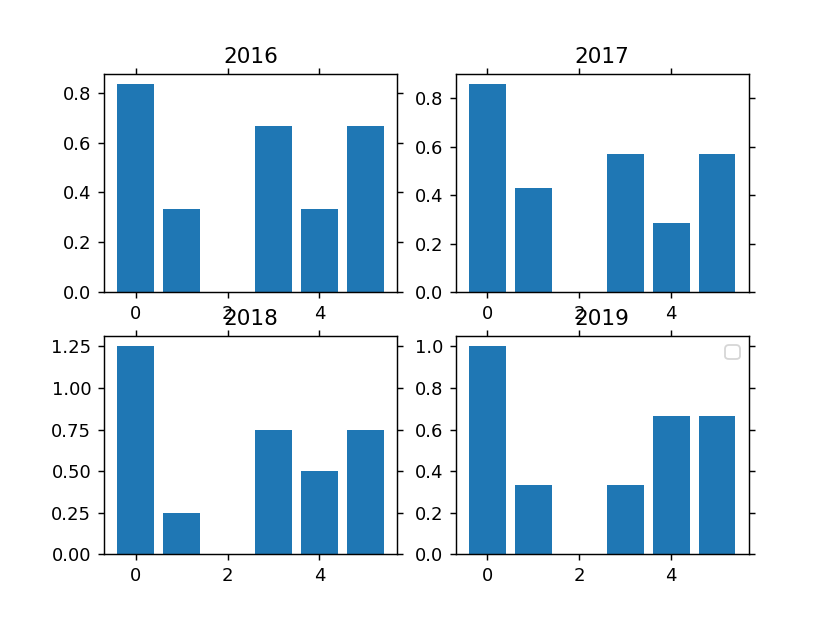

No handles with labels found to put in legend.


In [19]:
df_activity = df.groupby(['Year', 'Name']).agg({
        'Ceremony': sum, 
        'Media Spread': sum,
        'Religious Education': sum,
        'Cultural Activities': sum,
        'Literature Distribution': sum,
        'Charity': sum})

fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

pos = np.arange(6)
axes = {
    2016: ax1,
    2017: ax2,
    2018: ax3,
    2019: ax4,
}
for year in [2016, 2017, 2018, 2019]:
    axes[year].set_title(year)
    activity = df_activity.loc[year].mean()
    bars = axes[year].bar(pos, activity, align='center', linewidth=0)
    # plt.xticks(pos, df_agg2.columns, alpha=0.8)
    axes[year].tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')


# remove all the ticks (both axes), and tick labels on the Y axis
# plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

plt.legend()




<IPython.core.display.Javascript object>


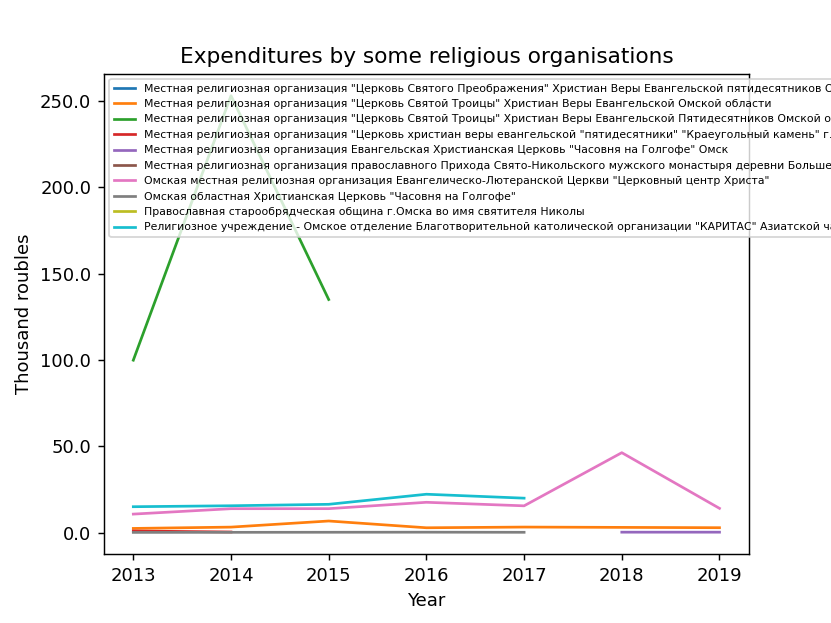

In [21]:
plt.figure()

def numfmt(x, pos): # custom formatter function: divide by 1000.0
    s = '{}'.format(x / 1000.0)
    return s

import matplotlib.ticker as tkr     # has classes for tick-locating and -formatting
yfmt = tkr.FuncFormatter(numfmt)    # create your custom formatter function

nums = df_expenditures.index.get_level_values('Name').unique()
for num in nums:
    df_expenditures.loc[num]['Expenditures'].plot()
    
plt.ylabel('Thousand roubles')

plt.legend(labels=nums, loc=2, prop={'size': 6})
plt.title('Expenditures by some religious organisations')
plt.gca().yaxis.set_major_formatter(yfmt)

